# Import Python Packages & Libraries

In [8]:
import geopandas as gpd
import matplotlib.colors as colors
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
from astropy.modeling import models, fitting
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as py
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from IPython.display import display_html 
from shapely.geometry import Point, Polygon

class BOLD:
   B_start = '\033[1m'
   B_end = '\033[0m'
class UNDERLINE:
    U_start = '\033[4m'
    U_end = '\033[0m'

# Ozone

### Line Plots (2016, 2017, 2018)

Bronx       365
New York    365
Queens      365
Richmond    365
Name: COUNTY, dtype: int64


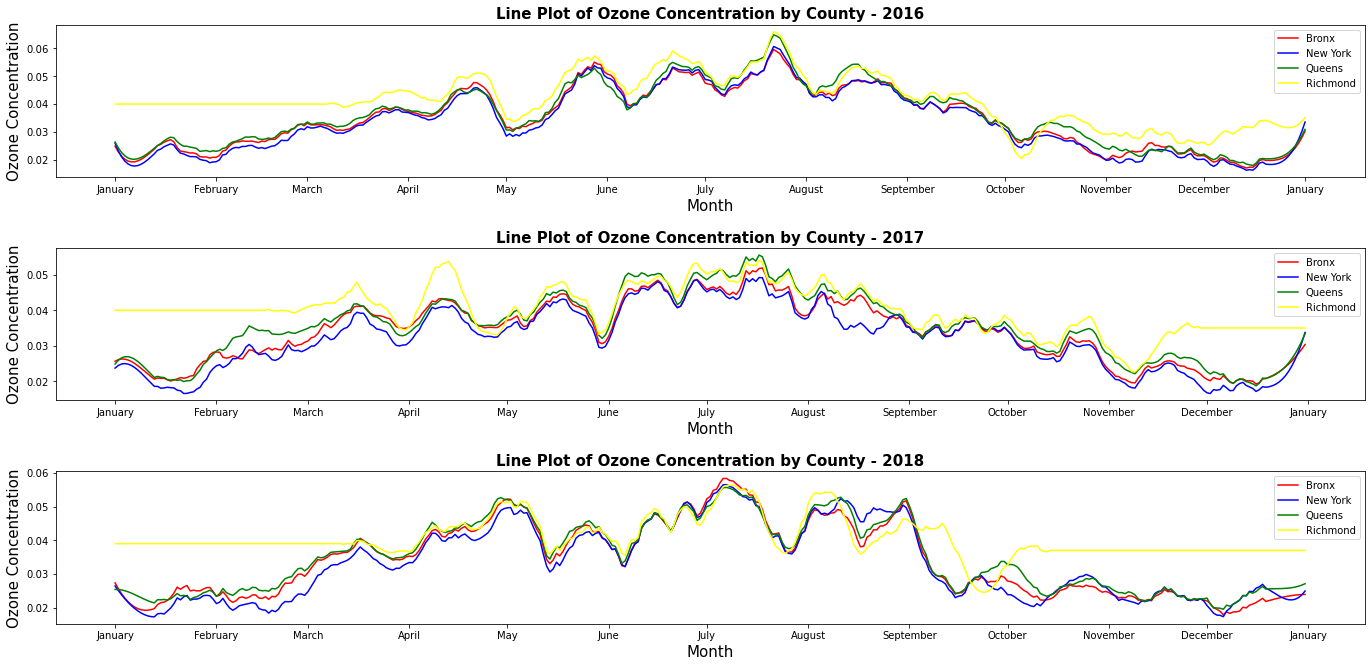

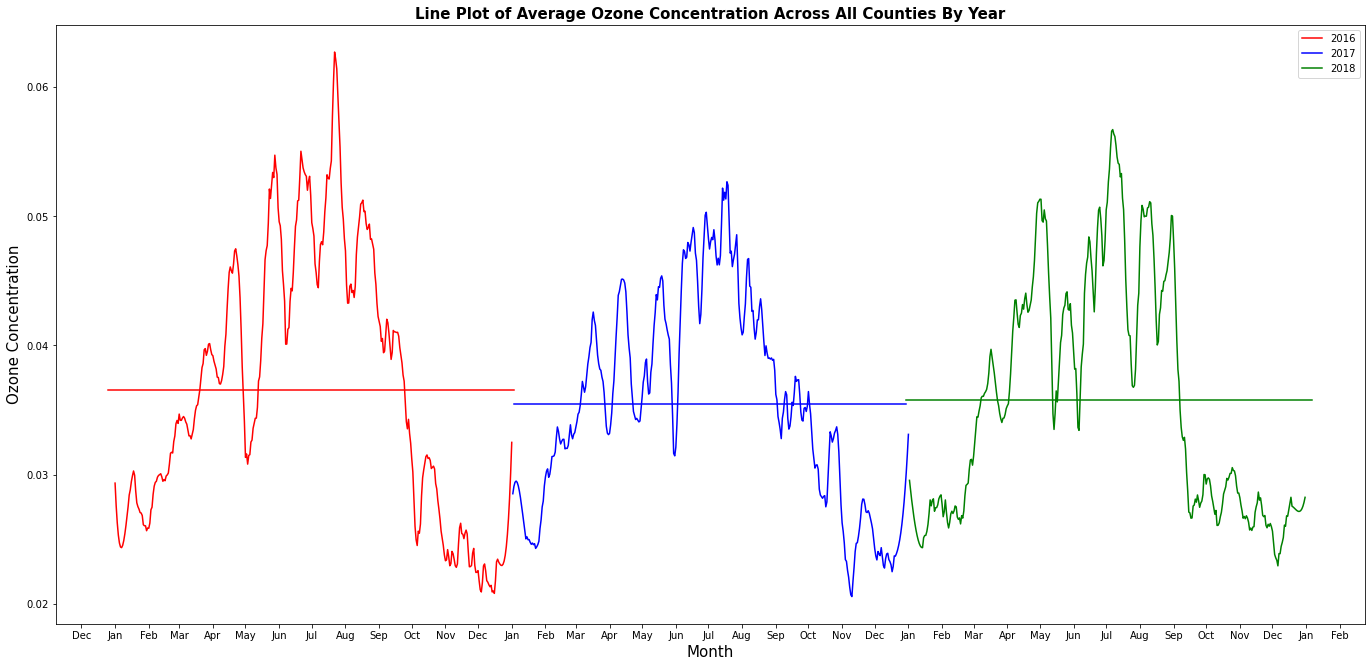

In [9]:
Ozone_2016 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/Ozone/Ozone.2016.All_Sites_NEW.csv")
Ozone_2017 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/Ozone/Ozone.2017.All_Sites_NEW.csv")
Ozone_2018 = pd.read_csv("/Users/wwaynerichards/Desktop/Biomedical Informatics Degree/Data Wrangling/Group Project/AQI Data/Ozone/Ozone.2018.All_Sites_NEW.csv")

print(Ozone_2018["COUNTY"].value_counts())

# Bronx Ozone (2016, 2017, 2018)
BRONX_Ozone_2016 = Ozone_2016[Ozone_2016["COUNTY"] == "Bronx"]
BRONX_Ozone_2017 = Ozone_2017[Ozone_2017["COUNTY"] == "Bronx"]
BRONX_Ozone_2018 = Ozone_2018[Ozone_2018["COUNTY"] == "Bronx"]

BRONX_COMBINED = pd.DataFrame()
BRONX_COMBINED = pd.concat([BRONX_Ozone_2016.reset_index(drop = True, inplace = False),
                BRONX_Ozone_2017.reset_index(drop = True, inplace = False),
                BRONX_Ozone_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# New York Ozone (2016, 2017, 2018)
NY_Ozone_2016 = Ozone_2016[Ozone_2016["COUNTY"] == "New York"]
NY_Ozone_2017 = Ozone_2017[Ozone_2017["COUNTY"] == "New York"]
NY_Ozone_2018 = Ozone_2018[Ozone_2018["COUNTY"] == "New York"]

NY_COMBINED = pd.DataFrame()
NY_COMBINED = pd.concat([NY_Ozone_2016.reset_index(drop = True, inplace = False),
                NY_Ozone_2017.reset_index(drop = True, inplace = False),
                NY_Ozone_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Queens Ozone (2016, 2017, 2018)
QUEENS_Ozone_2016 = Ozone_2016[Ozone_2016["COUNTY"] == "Queens"]
QUEENS_Ozone_2017 = Ozone_2017[Ozone_2017["COUNTY"] == "Queens"]
QUEENS_Ozone_2018 = Ozone_2018[Ozone_2018["COUNTY"] == "Queens"]

QUEENS_COMBINED = pd.DataFrame()
QUEENS_COMBINED = pd.concat([QUEENS_Ozone_2016.reset_index(drop = True, inplace = False),
                QUEENS_Ozone_2017.reset_index(drop = True, inplace = False),
                QUEENS_Ozone_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

# Richmond Ozone (2016, 2017, 2018)
RICHMOND_Ozone_2016 = Ozone_2016[Ozone_2016["COUNTY"] == "Richmond"]
RICHMOND_Ozone_2017 = Ozone_2017[Ozone_2017["COUNTY"] == "Richmond"]
RICHMOND_Ozone_2018 = Ozone_2018[Ozone_2018["COUNTY"] == "Richmond"]

RICHMOND_COMBINED = pd.DataFrame()
RICHMOND_COMBINED = pd.concat([RICHMOND_Ozone_2016.reset_index(drop = True, inplace = False),
                RICHMOND_Ozone_2017.reset_index(drop = True, inplace = False),
                RICHMOND_Ozone_2018.reset_index(drop = True, inplace = False)], axis = 0, ignore_index = True)

Ozone_2016_MEAN = Ozone_2016.groupby(Ozone_2016["DATE"])["AQI_CONC"].mean()
Ozone_2017_MEAN = Ozone_2017.groupby(Ozone_2017["DATE"])["AQI_CONC"].mean()
Ozone_2018_MEAN = Ozone_2018.groupby(Ozone_2018["DATE"])["AQI_CONC"].mean()

# Line Plot Overlaying Each County for Ozone in 2016
fig, (ax1, ax2, ax3)  = plt.subplots(3, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["Bronx","New York","Queens","Richmond"]

# 2016
smoothed = savgol_filter(BRONX_Ozone_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(BRONX_Ozone_2016["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_Ozone_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(NY_Ozone_2016["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_Ozone_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(QUEENS_Ozone_2016["DATE"], smoothed, color = "green")
smoothed = savgol_filter(RICHMOND_Ozone_2016["AQI_CONC"], windowSize, polyOrder)
ax1.plot(RICHMOND_Ozone_2016["DATE"], smoothed, color = "yellow")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax1.set_title("Line Plot of Ozone Concentration by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("Ozone Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)

# 2017
smoothed = savgol_filter(BRONX_Ozone_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(BRONX_Ozone_2017["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_Ozone_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(NY_Ozone_2017["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_Ozone_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(QUEENS_Ozone_2017["DATE"], smoothed, color = "green")
smoothed = savgol_filter(RICHMOND_Ozone_2017["AQI_CONC"], windowSize, polyOrder)
ax2.plot(RICHMOND_Ozone_2017["DATE"], smoothed, color = "yellow")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax2.set_title("Line Plot of Ozone Concentration by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("Ozone Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)
ax2.legend(labels = legend_labels)

# 2018
smoothed = savgol_filter(BRONX_Ozone_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(BRONX_Ozone_2018["DATE"], smoothed, color = "red")
smoothed = savgol_filter(NY_Ozone_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(NY_Ozone_2018["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(QUEENS_Ozone_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(QUEENS_Ozone_2018["DATE"], smoothed, color = "green")
smoothed = savgol_filter(RICHMOND_Ozone_2018["AQI_CONC"], windowSize, polyOrder)
ax3.plot(RICHMOND_Ozone_2018["DATE"], smoothed, color = "yellow")
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%B"))
ax3.set_title("Line Plot of Ozone Concentration by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("Ozone Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
ax3.legend(labels = legend_labels)
plt.show()

# Averaged By Year (2016, 2017, 2018)
Ozone_2016_MEAN = Ozone_2016.groupby(Ozone_2016["DATE"])["AQI_CONC"].mean().reset_index()
Ozone_2017_MEAN = Ozone_2017.groupby(Ozone_2017["DATE"])["AQI_CONC"].mean().reset_index()
Ozone_2018_MEAN = Ozone_2018.groupby(Ozone_2018["DATE"])["AQI_CONC"].mean().reset_index()

# Averaged By Year (2016, 2017, 2018)
fig, ax1  = plt.subplots(1, 1, sharey = "row", figsize = (20,10))
fig.tight_layout(pad = 5.0)
windowSize = 25
polyOrder = 3
legend_labels = ["2016","2017","2018"]

# Averaged By Year (2016, 2017, 2018)
smoothed = savgol_filter(Ozone_2016_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(Ozone_2016_MEAN["DATE"], smoothed, color = "red")
smoothed = savgol_filter(Ozone_2017_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(Ozone_2017_MEAN["DATE"], smoothed, color = "blue")
smoothed = savgol_filter(Ozone_2018_MEAN["AQI_CONC"], windowSize, polyOrder)
ax1.plot(Ozone_2018_MEAN["DATE"], smoothed, color = "green")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax1.set_title("Line Plot of Average Ozone Concentration Across All Counties By Year", fontweight = "bold", size = 15)
ax1.set_ylabel("Ozone Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)
ax1.legend(labels = legend_labels)
ax1.axhline(y = Ozone_2016_MEAN["AQI_CONC"].mean(), color = "red", linestyle = '-', xmin = 0.04, xmax = 0.35)
ax1.axhline(y = Ozone_2017_MEAN["AQI_CONC"].mean(), color = "blue", linestyle = '-', xmin = 0.35, xmax = 0.65)
ax1.axhline(y = Ozone_2018_MEAN["AQI_CONC"].mean(), color = "green", linestyle = '-', xmin = 0.65, xmax = 0.96)

plt.show()

### Descriptive Statistics

In [10]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Ozone; Bronx"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(BRONX_Ozone_2016["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_Ozone_2017["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_Ozone_2018["AQI_CONC"].describe()),
                      pd.DataFrame(BRONX_COMBINED["AQI_CONC"].describe())], 
                     ["Bronx - 2016",
                      "Bronx - 2017",
                      "Bronx - 2018",
                      "Bronx - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Ozone; New York"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(NY_Ozone_2016["AQI_CONC"].describe()),
                      pd.DataFrame(NY_Ozone_2017["AQI_CONC"].describe()),
                      pd.DataFrame(NY_Ozone_2018["AQI_CONC"].describe()),
                      pd.DataFrame(NY_COMBINED["AQI_CONC"].describe())], 
                     ["New York - 2016",
                      "New York - 2017",
                      "New York - 2018",
                      "New York - Combined"])
print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Ozone; Queens"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(QUEENS_Ozone_2016["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_Ozone_2017["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_Ozone_2018["AQI_CONC"].describe()),
                      pd.DataFrame(QUEENS_COMBINED["AQI_CONC"].describe())], 
                     ["Queens - 2016",
                      "Queens - 2017",
                      "Queens - 2018",
                      "Queens - Combined"])

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"Descriptive Stats - Ozone; Richmond"+UNDERLINE.U_end+BOLD.B_end)
display_side_by_side([pd.DataFrame(RICHMOND_Ozone_2016["AQI_CONC"].describe()),
                      pd.DataFrame(RICHMOND_Ozone_2017["AQI_CONC"].describe()),
                      pd.DataFrame(RICHMOND_Ozone_2018["AQI_CONC"].describe()),
                      pd.DataFrame(RICHMOND_COMBINED["AQI_CONC"].describe())], 
                     ["Richmond - 2016",
                      "Richmond - 2017",
                      "Richmond - 2018",
                      "Richmond - Combined"])

Descriptive Stats - Ozone; Bronx


,AQI_CONC
count,366.000000
mean,0.034863
std,0.013744
min,0.003000
25%,0.026000
50%,0.032000
75%,0.043000
max,0.079000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - Ozone; New York


,AQI_CONC
count,366.000000
mean,0.033945
std,0.014244
min,0.002000
25%,0.024000
50%,0.032000
75%,0.042000
max,0.078000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - Ozone; Queens


,AQI_CONC
count,366.000000
mean,0.036003
std,0.013876
min,0.002000
25%,0.027000
50%,0.034000
75%,0.044750
max,0.083000
,AQI_CONC
count,365.000000


_________________________________________________________________________________


Descriptive Stats - Ozone; Richmond


,AQI_CONC
count,366.000000
mean,0.041484
std,0.012539
min,0.008000
25%,0.033000
50%,0.040000
75%,0.048000
max,0.086000
,AQI_CONC
count,365.000000


### Box Plots (2016, 2017, 2018)

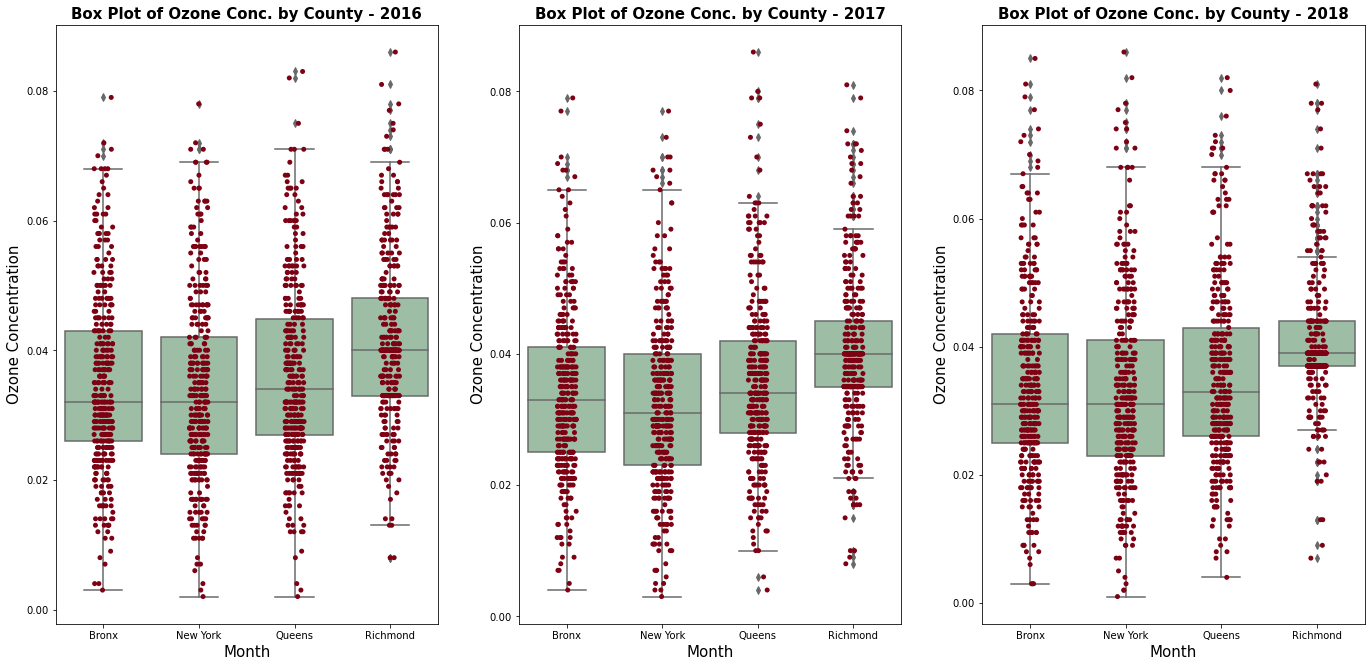

_________________________________________________________________________________


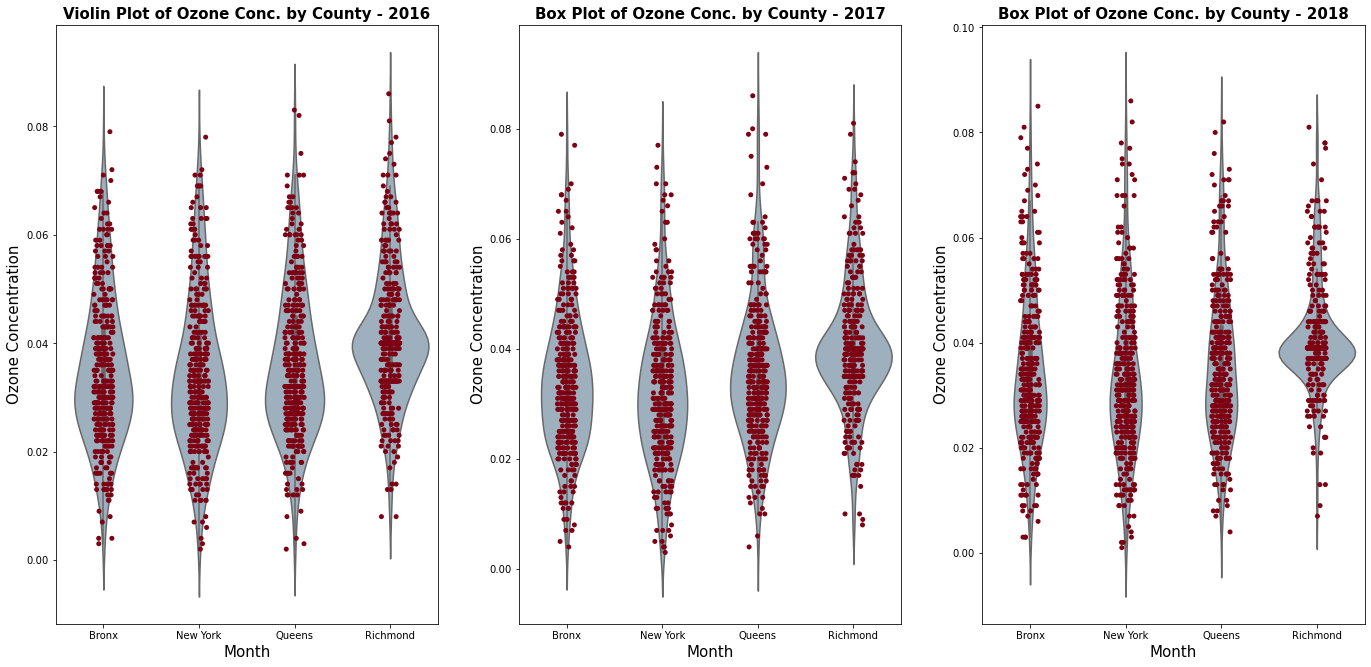

In [11]:
# Box Plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2016, color = "#99c2a2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Box Plot of Ozone Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("Ozone Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2017, color = "#99c2a2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of Ozone Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("Ozone Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.boxplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2018, color = "#99c2a2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of Ozone Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("Ozone Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
# Violin Plots

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2016, color = "#99b1c2", ax = ax1, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2016, color = "#7d0013", marker = "o", size = 5, ax = ax1, orient = "v")
ax1.set_title("Violin Plot of Ozone Conc. by County - 2016", fontweight = "bold", size = 15)
ax1.set_ylabel("Ozone Concentration", fontsize = 15)
ax1.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2017, color = "#99b1c2", ax = ax2, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2017, color = "#7d0013", marker = "o", size = 5, ax = ax2, orient = "v")
ax2.set_title("Box Plot of Ozone Conc. by County - 2017", fontweight = "bold", size = 15)
ax2.set_ylabel("Ozone Concentration", fontsize = 15)
ax2.set_xlabel("Month", fontsize = 15)

sns.violinplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2018, color = "#99b1c2", ax = ax3, orient = "v")
sns.stripplot(x = "COUNTY", y = "AQI_CONC", data = Ozone_2018, color = "#7d0013", marker = "o", size = 5, ax = ax3, orient = "v")
ax3.set_title("Box Plot of Ozone Conc. by County - 2018", fontweight = "bold", size = 15)
ax3.set_ylabel("Ozone Concentration", fontsize = 15)
ax3.set_xlabel("Month", fontsize = 15)
plt.show()


### T-Tests & ANOVA Tests (2016, 2017, 2018)

In [17]:
# T-Test comparison by variables

#2016
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Ozone 2016"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - Ozone 2016")
fvalue, pvalue = stats.ttest_ind(NY_Ozone_2016["AQI_CONC"],BRONX_Ozone_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - Ozone 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_Ozone_2016["AQI_CONC"],BRONX_Ozone_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - Ozone 2016")
fvalue, pvalue = stats.ttest_ind(QUEENS_Ozone_2016["AQI_CONC"],NY_Ozone_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Bronx - Ozone 2016")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2016["AQI_CONC"],BRONX_Ozone_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. NY - Ozone 2016")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2016["AQI_CONC"],NY_Ozone_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Queens - Ozone 2016")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2016["AQI_CONC"],QUEENS_Ozone_2016["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Ozone 2016"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_Ozone_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_Ozone_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_Ozone_2016["AQI_CONC"].reset_index(drop = True, inplace = False),
                RICHMOND_Ozone_2016["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx",3:"Richmond"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Richmond + Richmond:Bronx + Richmond:Queens + Richmond:NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

# The Pr(>F) column is the p value of the F statistic. 
# This shows how likely it is that the F value calculated from the test would have occurred if the null 
# hypothesis of no difference among group means were true.

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

#2017
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Ozone 2017"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - Ozone 2017")
fvalue, pvalue = stats.ttest_ind(NY_Ozone_2017["AQI_CONC"],BRONX_Ozone_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - Ozone 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_Ozone_2017["AQI_CONC"],BRONX_Ozone_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - Ozone 2017")
fvalue, pvalue = stats.ttest_ind(QUEENS_Ozone_2017["AQI_CONC"],NY_Ozone_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Bronx - Ozone 2017")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2017["AQI_CONC"],BRONX_Ozone_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. NY - Ozone 2017")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2017["AQI_CONC"],NY_Ozone_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Queens - Ozone 2017")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2017["AQI_CONC"],QUEENS_Ozone_2017["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Ozone 2017"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_Ozone_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_Ozone_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_Ozone_2017["AQI_CONC"].reset_index(drop = True, inplace = False),
                RICHMOND_Ozone_2017["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx",3:"Richmond"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Richmond + Richmond:Bronx + Richmond:Queens + Richmond:NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

#2018
print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Ozone 2018"+UNDERLINE.U_end+BOLD.B_end)
print("NY vs. Bronx - Ozone 2018")
fvalue, pvalue = stats.ttest_ind(NY_Ozone_2018["AQI_CONC"],BRONX_Ozone_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. Bronx - Ozone 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_Ozone_2018["AQI_CONC"],BRONX_Ozone_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Queens vs. NY - Ozone 2018")
fvalue, pvalue = stats.ttest_ind(QUEENS_Ozone_2018["AQI_CONC"],NY_Ozone_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Bronx - Ozone 2018")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2018["AQI_CONC"],BRONX_Ozone_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. NY - Ozone 2017")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2018["AQI_CONC"],NY_Ozone_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")
print("Richmond vs. Queens - Ozone 2018")
fvalue, pvalue = stats.ttest_ind(RICHMOND_Ozone_2018["AQI_CONC"],QUEENS_Ozone_2018["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

# Ordinary Least Squares (OLS) model
print(BOLD.B_start+UNDERLINE.U_start+"ANOVA - Ozone 2018"+UNDERLINE.U_end+BOLD.B_end)
anova_df = pd.DataFrame()
anova_df = pd.concat([NY_Ozone_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                QUEENS_Ozone_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                BRONX_Ozone_2018["AQI_CONC"].reset_index(drop = True, inplace = False),
                RICHMOND_Ozone_2018["AQI_CONC"].reset_index(drop = True, inplace = False)], axis = 1, ignore_index = True)
anova_df = anova_df.rename(columns = {0:"NY",1:"Queens",2:"Bronx",3:"Richmond"})
moore_lm = ols("""Bronx ~ Bronx + Queens + NY + Richmond + Richmond:Bronx + Richmond:Queens + Richmond:NY + Bronx:NY + Bronx:Queens + Queens:NY""", data = anova_df).fit()
anova_table = sm.stats.anova_lm(moore_lm, typ = 2)
print(anova_table)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)
print("\n")

print(BOLD.B_start+UNDERLINE.U_start+"T-Test - Ozone All Years"+UNDERLINE.U_end+BOLD.B_end)
print("2016 vs. 2017 - Ozone")
fvalue, pvalue = stats.ttest_ind(Ozone_2016_MEAN["AQI_CONC"],Ozone_2017_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2016 vs. 2018 - Ozone")
fvalue, pvalue = stats.ttest_ind(Ozone_2016_MEAN["AQI_CONC"],Ozone_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")

print("2017 vs. 2018 - Ozone")
fvalue, pvalue = stats.ttest_ind(Ozone_2017_MEAN["AQI_CONC"],Ozone_2018_MEAN["AQI_CONC"])
print("t-Value: {}".format(round(fvalue,4)), "p-Value: {}".format(pvalue))
print("\n")


T-Test - Ozone 2016
NY vs. Bronx - Ozone 2016
t-Value: -0.8873 p-Value: 0.37520243977879


Queens vs. Bronx - Ozone 2016
t-Value: 1.1161 p-Value: 0.2647668860427861


Queens vs. NY - Ozone 2016
t-Value: 1.9793 p-Value: 0.048158028052453734


Richmond vs. Bronx - Ozone 2016
t-Value: 6.8077 p-Value: 2.0714110573898225e-11


Richmond vs. NY - Ozone 2016
t-Value: 7.5994 p-Value: 9.145291186733143e-14


Richmond vs. Queens - Ozone 2016
t-Value: 5.6065 p-Value: 2.9298277127150327e-08


ANOVA - Ozone 2016
                       sum_sq     df             F    PR(>F)
Bronx            2.162159e-03    1.0  4.698874e+29  0.000000
Queens           2.168050e-33    1.0  4.711678e-01  0.492899
NY               9.406063e-34    1.0  2.044156e-01  0.651456
Richmond         1.863958e-32    1.0  4.050814e+00  0.044905
Richmond:Bronx   1.457836e-34    1.0  3.168217e-02  0.858829
Richmond:Queens  1.944226e-33    1.0  4.225256e-01  0.516100
Richmond:NY      5.988583e-34    1.0  1.301458e-01  0.718495
Bronx:NY

### Histograms w/Curve Fitting (2016, 2017, 2018)

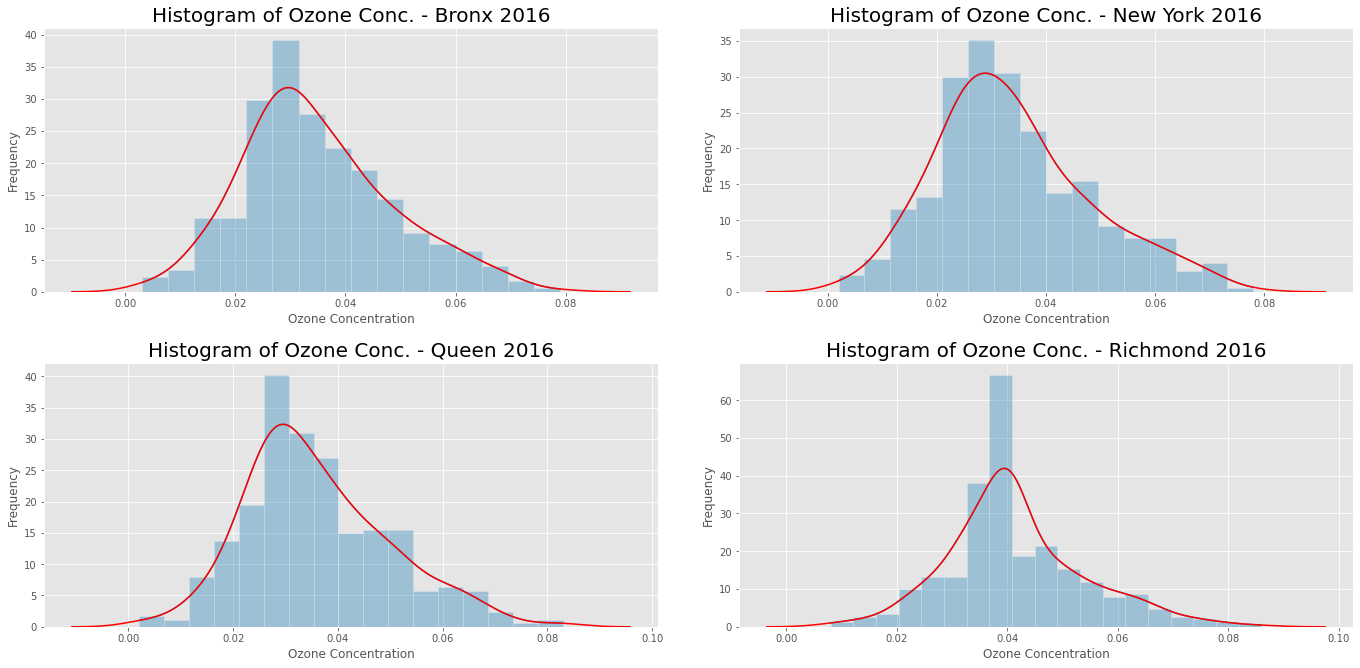

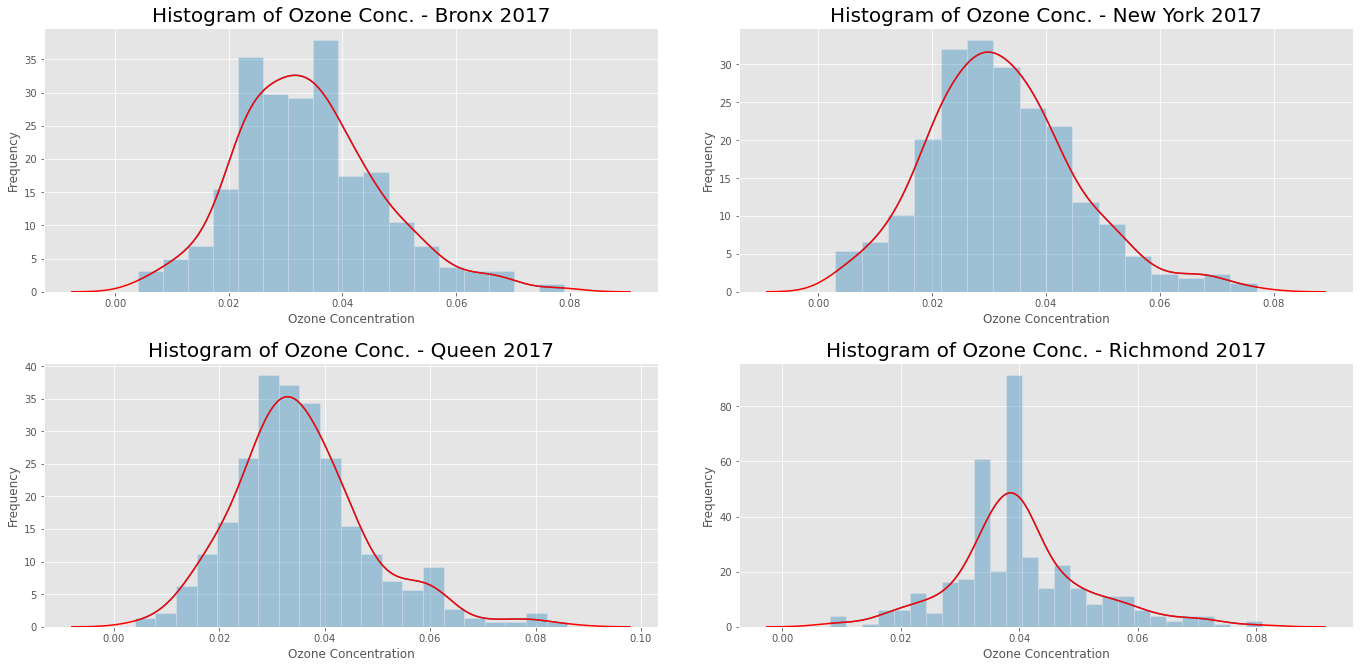

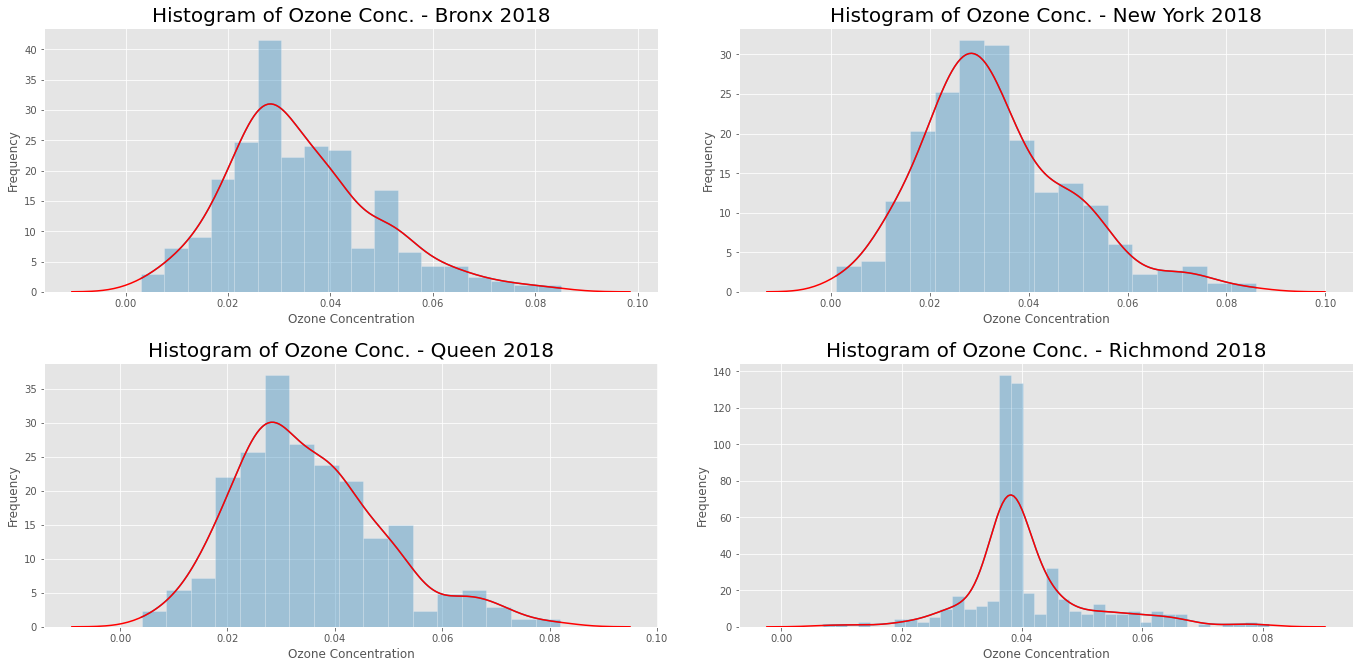



Shapiro-Wilk Test for Normality


,AQI,County,Year,Statistic,p-Value
0,CO,Bronx,2016,0.978379,2.688756e-05
1,CO,New York,2016,0.974174,4.103410e-06
2,CO,Queens,2016,0.973281,2.808612e-06
3,CO,Richmond,2016,0.965408,1.286670e-07
4,CO,Bronx,2017,0.979569,4.845780e-05
5,CO,New York,2017,0.981865,1.497191e-04
6,CO,Queens,2017,0.965563,1.409296e-07
7,CO,Richmond,2017,0.956607,6.622004e-09
8,CO,Bronx,2018,0.969953,7.467685e-07
9,CO,New York,2018,0.968065,3.589633e-07


D’Agostino and Pearson Test for Normality


,AQI,County,Year,Statistic,p-Value
0,CO,Bronx,2016,14.907515,5.792610e-04
1,CO,New York,2016,17.410224,1.657364e-04
2,CO,Queens,2016,20.695640,3.206261e-05
3,CO,Richmond,2016,21.952982,1.709899e-05
4,CO,Bronx,2017,22.316208,1.425926e-05
5,CO,New York,2017,18.452120,9.844032e-05
6,CO,Queens,2017,40.675361,1.470475e-09
7,CO,Richmond,2017,25.674680,2.659587e-06
8,CO,Bronx,2018,27.544049,1.044446e-06
9,CO,New York,2018,29.599291,3.737624e-07


Text(0.5, 1.0, 'Q/Q Plot - Ozone; Richmond; 2018')

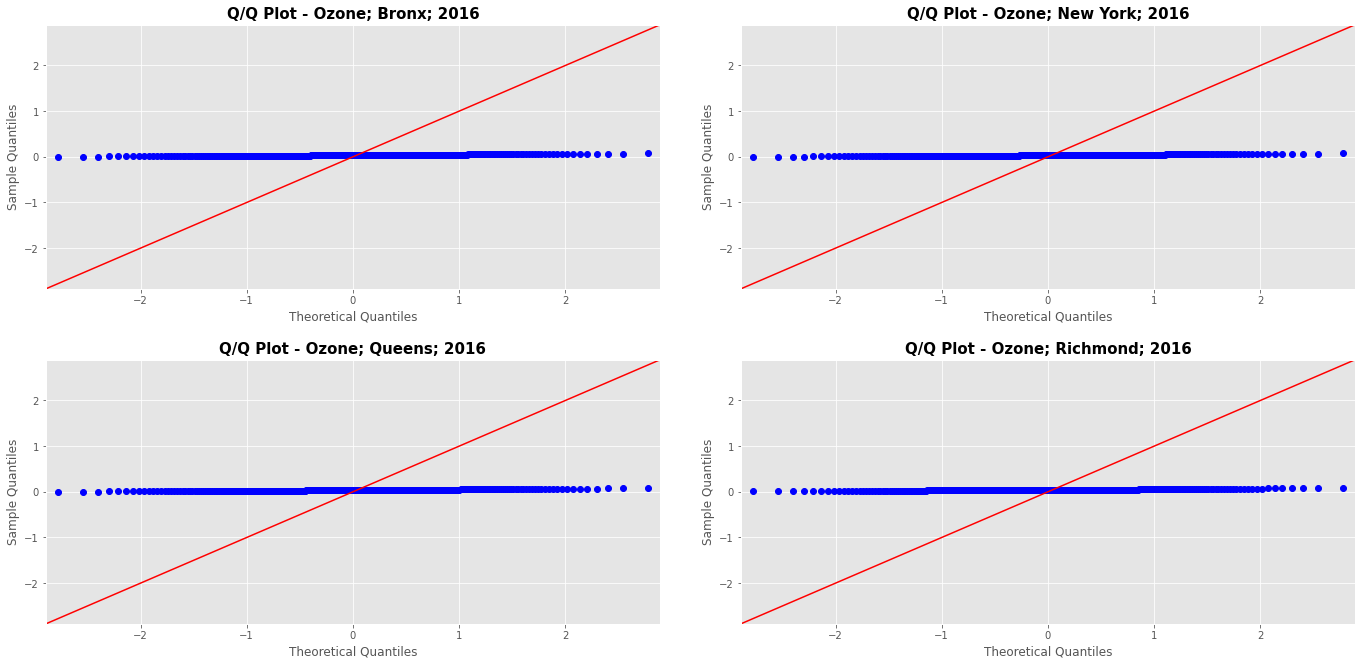

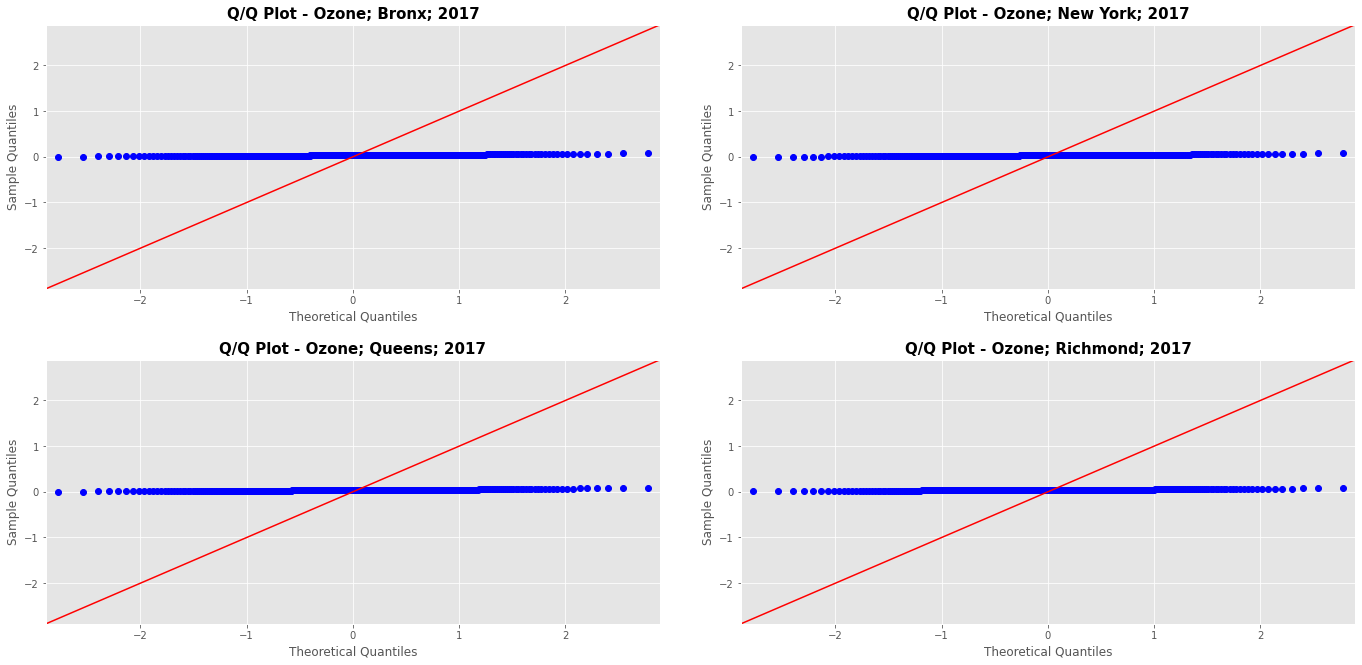

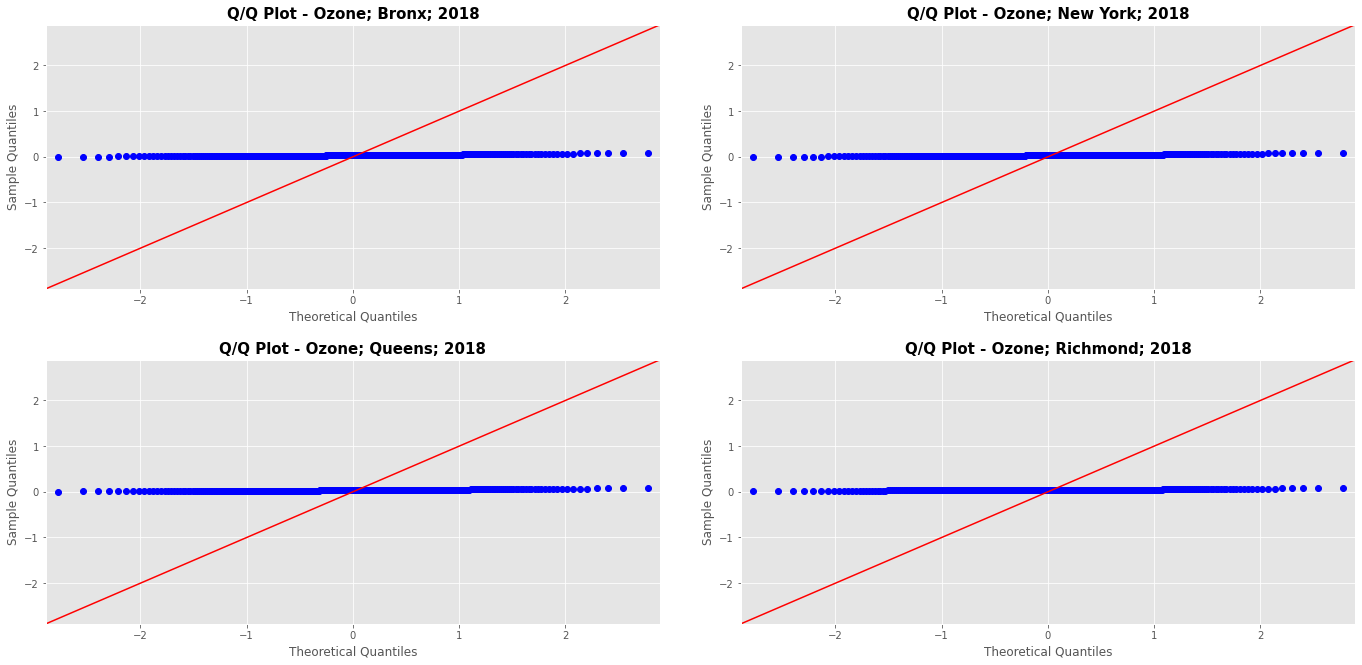

In [43]:
# 2016
plt.style.use("ggplot")
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Ozone Concentration for Bronx County w/Curve Fit - 2016"
sns.histplot(BRONX_Ozone_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_Ozone_2016, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("Ozone Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of Ozone Conc. - Bronx 2016", fontsize = 20)

# "Histogram of Ozone Concentration for New York County w/Curve Fit - 2016"
sns.histplot(NY_Ozone_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_Ozone_2016, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("Ozone Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of Ozone Conc. - New York 2016", fontsize = 20)

# "Histogram of Ozone Concentration for Queens County w/Curve Fit - 2016"
sns.histplot(QUEENS_Ozone_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_Ozone_2016, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("Ozone Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of Ozone Conc. - Queen 2016", fontsize = 20)

# "Histogram of Ozone Concentration for Richmond County w/Curve Fit - 2016"
sns.histplot(RICHMOND_Ozone_2016["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax4)
sns.kdeplot(data = RICHMOND_Ozone_2016, x = "AQI_CONC", color = "red", ax = ax4)
ax4.set_xlabel("Ozone Concentration", fontsize = 12)
ax4.set_ylabel("Frequency", fontsize = 12)
ax4.set_title("Histogram of Ozone Conc. - Richmond 2016", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2017
plt.style.use("ggplot")
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Ozone Concentration for Bronx County w/Curve Fit - 2017"
sns.histplot(BRONX_Ozone_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_Ozone_2017, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("Ozone Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of Ozone Conc. - Bronx 2017", fontsize = 20)

# "Histogram of Ozone Concentration for New York County w/Curve Fit - 2017"
sns.histplot(NY_Ozone_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_Ozone_2017, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("Ozone Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of Ozone Conc. - New York 2017", fontsize = 20)

# "Histogram of Ozone Concentration for Queens County w/Curve Fit - 2017"
sns.histplot(QUEENS_Ozone_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_Ozone_2017, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("Ozone Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of Ozone Conc. - Queen 2017", fontsize = 20)

# "Histogram of Ozone Concentration for Richmond County w/Curve Fit - 2017"
sns.histplot(RICHMOND_Ozone_2017["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax4)
sns.kdeplot(data = RICHMOND_Ozone_2017, x = "AQI_CONC", color = "red", ax = ax4)
ax4.set_xlabel("Ozone Concentration", fontsize = 12)
ax4.set_ylabel("Frequency", fontsize = 12)
ax4.set_title("Histogram of Ozone Conc. - Richmond 2017", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# 2018
plt.style.use("ggplot")
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)

# "Histogram of Ozone Concentration for Bronx County w/Curve Fit - 2018"
sns.histplot(BRONX_Ozone_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax1)
sns.kdeplot(data = BRONX_Ozone_2018, x = "AQI_CONC", color = "red", ax = ax1)
ax1.set_xlabel("Ozone Concentration", fontsize = 12)
ax1.set_ylabel("Frequency", fontsize = 12)
ax1.set_title("Histogram of Ozone Conc. - Bronx 2018", fontsize = 20)

# "Histogram of Ozone Concentration for New York County w/Curve Fit - 2018"
sns.histplot(NY_Ozone_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax2)
sns.kdeplot(data = NY_Ozone_2018, x = "AQI_CONC", color = "red", ax = ax2)
ax2.set_xlabel("Ozone Concentration", fontsize = 12)
ax2.set_ylabel("Frequency", fontsize = 12)
ax2.set_title("Histogram of Ozone Conc. - New York 2018", fontsize = 20)

# "Histogram of Ozone Concentration for Queens County w/Curve Fit - 2018"
sns.histplot(QUEENS_Ozone_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax3)
sns.kdeplot(data = QUEENS_Ozone_2018, x = "AQI_CONC", color = "red", ax = ax3)
ax3.set_xlabel("Ozone Concentration", fontsize = 12)
ax3.set_ylabel("Frequency", fontsize = 12)
ax3.set_title("Histogram of Ozone Conc. - Queen 2018", fontsize = 20)

# "Histogram of Ozone Concentration for Richmond County w/Curve Fit - 2018"
sns.histplot(RICHMOND_Ozone_2018["AQI_CONC"], kde = True, stat = "density", alpha = .4, edgecolor=(1, 1, 1, .4), ax = ax4)
sns.kdeplot(data = RICHMOND_Ozone_2018, x = "AQI_CONC", color = "red", ax = ax4)
ax4.set_xlabel("Ozone Concentration", fontsize = 12)
ax4.set_ylabel("Frequency", fontsize = 12)
ax4.set_title("Histogram of Ozone Conc. - Richmond 2018", fontsize = 20)
plt.show()

print("\n")

###############################################################################################################

# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# H0 = Data was pulled from a normal distribution
# HT = Data was NOT pulled from a normal distribution
# The Shapiro-Wilk test rejects the null hypothesis of normality when the p-value is less than or equal to 0.05

shapiro_df = pd.DataFrame({})
print(BOLD.B_start+UNDERLINE.U_start+"Shapiro-Wilk Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
shapiro_df = shapiro_df.append([{"AQI":"Ozone","County":"Bronx","Year":2016,"Statistic":stats.shapiro(BRONX_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_Ozone_2016["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"New York","Year":2016,"Statistic":stats.shapiro(NY_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_Ozone_2016["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Queens","Year":2016,"Statistic":stats.shapiro(QUEENS_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_Ozone_2016["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Richmond","Year":2016,"Statistic":stats.shapiro(RICHMOND_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.shapiro(RICHMOND_Ozone_2016["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Bronx","Year":2017,"Statistic":stats.shapiro(BRONX_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_Ozone_2017["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"New York","Year":2017,"Statistic":stats.shapiro(NY_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_Ozone_2017["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Queens","Year":2017,"Statistic":stats.shapiro(QUEENS_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_Ozone_2017["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Richmond","Year":2017,"Statistic":stats.shapiro(RICHMOND_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.shapiro(RICHMOND_Ozone_2017["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Bronx","Year":2018,"Statistic":stats.shapiro(BRONX_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(BRONX_Ozone_2018["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"New York","Year":2018,"Statistic":stats.shapiro(NY_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(NY_Ozone_2018["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Queens","Year":2018,"Statistic":stats.shapiro(QUEENS_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(QUEENS_Ozone_2018["AQI_CONC"]).pvalue},
                {"AQI":"Ozone","County":"Richmond","Year":2018,"Statistic":stats.shapiro(RICHMOND_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.shapiro(RICHMOND_Ozone_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(shapiro_df)

###############################################################################################################

# D’Agostino and Pearson Test for Normality
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

normality_df = pd.DataFrame()
print(BOLD.B_start+UNDERLINE.U_start+"D’Agostino and Pearson Test for Normality"+UNDERLINE.U_end+BOLD.B_end)
normality_df = normality_df.append([{"AQI":"Ozone","County":"Bronx","Year":2016,"Statistic":stats.normaltest(BRONX_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_Ozone_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"New York","Year":2016,"Statistic":stats.normaltest(NY_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_Ozone_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Queens","Year":2016,"Statistic":stats.normaltest(QUEENS_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_Ozone_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Richmond","Year":2016,"Statistic":stats.normaltest(RICHMOND_Ozone_2016["AQI_CONC"]).statistic,"p-Value":stats.normaltest(RICHMOND_Ozone_2016["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Bronx","Year":2017,"Statistic":stats.normaltest(BRONX_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_Ozone_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"New York","Year":2017,"Statistic":stats.normaltest(NY_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_Ozone_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Queens","Year":2017,"Statistic":stats.normaltest(QUEENS_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_Ozone_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Richmond","Year":2017,"Statistic":stats.normaltest(RICHMOND_Ozone_2017["AQI_CONC"]).statistic,"p-Value":stats.normaltest(RICHMOND_Ozone_2017["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Bronx","Year":2018,"Statistic":stats.normaltest(BRONX_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(BRONX_Ozone_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"New York","Year":2018,"Statistic":stats.normaltest(NY_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(NY_Ozone_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Queens","Year":2018,"Statistic":stats.normaltest(QUEENS_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(QUEENS_Ozone_2018["AQI_CONC"]).pvalue},
                                   {"AQI":"Ozone","County":"Richmond","Year":2018,"Statistic":stats.normaltest(RICHMOND_Ozone_2018["AQI_CONC"]).statistic,"p-Value":stats.normaltest(RICHMOND_Ozone_2018["AQI_CONC"]).pvalue}], ignore_index = True)
display(normality_df)
print("\n")
###############################################################################################################

# Q/Q Plot
# Normal Test - Tests whether a sample differs from a normal distribution.
# This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.
# If the p-val is very small, it means it is unlikely that the data came from a normal distribution.

#2016
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_Ozone_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - Ozone; Bronx; 2016", fontweight = "bold", size = 15)
sm.qqplot(NY_Ozone_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - Ozone; New York; 2016", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_Ozone_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - Ozone; Queens; 2016", fontweight = "bold", size = 15)
sm.qqplot(RICHMOND_Ozone_2016["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax4)
ax4.set_title("Q/Q Plot - Ozone; Richmond; 2016", fontweight = "bold", size = 15)

#2017
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_Ozone_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - Ozone; Bronx; 2017", fontweight = "bold", size = 15)
sm.qqplot(NY_Ozone_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - Ozone; New York; 2017", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_Ozone_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - Ozone; Queens; 2017", fontweight = "bold", size = 15)
sm.qqplot(RICHMOND_Ozone_2017["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax4)
ax4.set_title("Q/Q Plot - Ozone; Richmond; 2017", fontweight = "bold", size = 15)

#2018
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize = (20,10))
fig.tight_layout(pad = 5.0)
sm.qqplot(BRONX_Ozone_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax1)
ax1.set_title("Q/Q Plot - Ozone; Bronx; 2018", fontweight = "bold", size = 15)
sm.qqplot(NY_Ozone_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax2)
ax2.set_title("Q/Q Plot - Ozone; New York; 2018", fontweight = "bold", size = 15)
sm.qqplot(QUEENS_Ozone_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax3)
ax3.set_title("Q/Q Plot - Ozone; Queens; 2018", fontweight = "bold", size = 15)
sm.qqplot(RICHMOND_Ozone_2018["AQI_CONC"], line ='45', fmt = "b", marker = "o", ax = ax4)
ax4.set_title("Q/Q Plot - Ozone; Richmond; 2018", fontweight = "bold", size = 15)

### Min & Max Values & Dates 

In [44]:
# 2016 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_Ozone_2016_MIN = BRONX_Ozone_2016[BRONX_Ozone_2016["AQI_CONC"] == BRONX_Ozone_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_Ozone_2016_MIN = BRONX_Ozone_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_Ozone_2016_MIN)
NY_Ozone_2016_MIN = NY_Ozone_2016[NY_Ozone_2016["AQI_CONC"] == NY_Ozone_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_Ozone_2016_MIN = NY_Ozone_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_Ozone_2016_MIN)
QUEENS_Ozone_2016_MIN = QUEENS_Ozone_2016[QUEENS_Ozone_2016["AQI_CONC"] == QUEENS_Ozone_2016["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_Ozone_2016_MIN = QUEENS_Ozone_2016_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_Ozone_2016_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2016 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2016"+UNDERLINE.U_end+BOLD.B_end)
BRONX_Ozone_2016_MAX = BRONX_Ozone_2016[BRONX_Ozone_2016["AQI_CONC"] == BRONX_Ozone_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_Ozone_2016_MAX = BRONX_Ozone_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_Ozone_2016_MAX)
NY_Ozone_2016_MAX = NY_Ozone_2016[NY_Ozone_2016["AQI_CONC"] == NY_Ozone_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_Ozone_2016_MAX = NY_Ozone_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_Ozone_2016_MAX)
QUEENS_Ozone_2016_MAX = QUEENS_Ozone_2016[QUEENS_Ozone_2016["AQI_CONC"] == QUEENS_Ozone_2016["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_Ozone_2016_MAX = QUEENS_Ozone_2016_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_Ozone_2016_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_Ozone_2017_MIN = BRONX_Ozone_2017[BRONX_Ozone_2017["AQI_CONC"] == BRONX_Ozone_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_Ozone_2017_MIN = BRONX_Ozone_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_Ozone_2017_MIN)
NY_Ozone_2017_MIN = NY_Ozone_2017[NY_Ozone_2017["AQI_CONC"] == NY_Ozone_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_Ozone_2017_MIN = NY_Ozone_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_Ozone_2017_MIN)
QUEENS_Ozone_2017_MIN = QUEENS_Ozone_2017[QUEENS_Ozone_2017["AQI_CONC"] == QUEENS_Ozone_2017["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_Ozone_2017_MIN = QUEENS_Ozone_2017_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_Ozone_2017_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2017 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2017"+UNDERLINE.U_end+BOLD.B_end)
BRONX_Ozone_2017_MAX = BRONX_Ozone_2017[BRONX_Ozone_2017["AQI_CONC"] == BRONX_Ozone_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_Ozone_2017_MAX = BRONX_Ozone_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_Ozone_2017_MAX)
NY_Ozone_2017_MAX = NY_Ozone_2017[NY_Ozone_2017["AQI_CONC"] == NY_Ozone_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_Ozone_2017_MAX = NY_Ozone_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_Ozone_2017_MAX)
QUEENS_Ozone_2017_MAX = QUEENS_Ozone_2017[QUEENS_Ozone_2017["AQI_CONC"] == QUEENS_Ozone_2017["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_Ozone_2017_MAX = QUEENS_Ozone_2017_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_Ozone_2017_MAX)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Min
print(BOLD.B_start+UNDERLINE.U_start+"Minimum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_Ozone_2018_MIN = BRONX_Ozone_2018[BRONX_Ozone_2018["AQI_CONC"] == BRONX_Ozone_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_Ozone_2018_MIN = BRONX_Ozone_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_Ozone_2018_MIN)
NY_Ozone_2018_MIN = NY_Ozone_2018[NY_Ozone_2018["AQI_CONC"] == NY_Ozone_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_Ozone_2018_MIN = NY_Ozone_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_Ozone_2018_MIN)
QUEENS_Ozone_2018_MIN = QUEENS_Ozone_2018[QUEENS_Ozone_2018["AQI_CONC"] == QUEENS_Ozone_2018["AQI_CONC"].min()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_Ozone_2018_MIN = QUEENS_Ozone_2018_MIN.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_Ozone_2018_MIN)

print(BOLD.B_start+"_________________________________________________________________________________"+BOLD.B_end)

# 2018 Max
print(BOLD.B_start+UNDERLINE.U_start+"Maximum AQI Conc. & Date - 2018"+UNDERLINE.U_end+BOLD.B_end)
BRONX_Ozone_2018_MAX = BRONX_Ozone_2018[BRONX_Ozone_2018["AQI_CONC"] == BRONX_Ozone_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
BRONX_Ozone_2018_MAX = BRONX_Ozone_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(BRONX_Ozone_2018_MAX)
NY_Ozone_2018_MAX = NY_Ozone_2018[NY_Ozone_2018["AQI_CONC"] == NY_Ozone_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
NY_Ozone_2018_MAX = NY_Ozone_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(NY_Ozone_2018_MAX)
QUEENS_Ozone_2018_MAX = QUEENS_Ozone_2018[QUEENS_Ozone_2018["AQI_CONC"] == QUEENS_Ozone_2018["AQI_CONC"].max()][["DATE","AQI_CONC","AQI_UNITS","COUNTY"]]
QUEENS_Ozone_2018_MAX = QUEENS_Ozone_2018_MAX.drop_duplicates(subset = ["AQI_CONC"], keep = "first")
display(QUEENS_Ozone_2018_MAX)

Minimum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
329,2016-11-25,0.003,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
717,2016-12-17,0.002,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
738,2016-01-07,0.002,ppm,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2016


,DATE,AQI_CONC,AQI_UNITS,COUNTY
145,2016-05-25,0.079,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
511,2016-05-25,0.078,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
877,2016-05-25,0.083,ppm,Queens


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
20,2017-01-21,0.004,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
720,2017-12-22,0.003,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
750,2017-01-21,0.004,ppm,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2017


,DATE,AQI_CONC,AQI_UNITS,COUNTY
202,2017-07-22,0.079,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
527,2017-06-12,0.077,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
892,2017-06-12,0.086,ppm,Queens


_________________________________________________________________________________
Minimum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
10,2018-01-11,0.003,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
410,2018-02-15,0.001,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
775,2018-02-15,0.004,ppm,Queens


_________________________________________________________________________________
Maximum AQI Conc. & Date - 2018


,DATE,AQI_CONC,AQI_UNITS,COUNTY
182,2018-07-02,0.085,ppm,Bronx


,DATE,AQI_CONC,AQI_UNITS,COUNTY
547,2018-07-02,0.086,ppm,New York


,DATE,AQI_CONC,AQI_UNITS,COUNTY
920,2018-07-10,0.082,ppm,Queens


### Geospatial Plot

In [ ]:
#display(BRONX_Ozone_2016.head())
ny_map = gpd.read_file('/Users/wwaynerichards/Desktop/Borough Boundaries/geo_export_4bf61b73-3f85-41ef-9ccc-c01719c9f685.shp')
ny_map = ny_map.astype({'boro_code':'int64'}).rename(columns = {"boro_code":"COUNTY"})
display(ny_map)

#fig, ax = plt.subplots(figsize = (15,15))
#ny_map.plot(ax = ax)
#plt.show()

Ozone_2016

geo_df = ny_map.merge(CO_2016, left_on = "COUNTY", how = "left")           
geo_df.head(3)



#crs = {'init':'epsg:4326'}

#geometry = [Polygon(xy) for xy in zip(BRONX_CO_2016["SITE_LONGITUDE"], BRONX_CO_2016["SITE_LATITUDE"])]
#display()

#geo_df = gpd.GeoDataFrame(BRONX_CO_2016, crs = crs, geometry = geometry)
#geo_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
geoplot.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Neg')
plt.legend(prop = {'size':15})
plt.show()